# MTH 651: Advanced Numerical Analysis

## Lecture 1

### Topics

* Class logistics
  * Lectures
  * Office hours
  * Grading
  * Text book
* Software
  * Canvas
  * Colab
  * Coeus
  * JupyterLab
* Introductions and background
* Course goals and topics
* "Warm up"
  * Review of some basic numerical methods
    * Finite difference quotients
    * Rates of convergence, empirical rates of convergence
    * Finite differences for 1D Poisson

### Coarse Goals

* We are intersted in the **numerical solution** of **partial differential equations**.
* We want to use computer algorithms to obtain _approximate_ (i.e. "numerical") solutions to PDEs
* For the most part, we are interested in PDEs that govern physical systems
  * For example: heat transfer, fluid dynamics, electromagnetic, structural mechanics, etc.
* Obtaining approximate solutions to these PDEs allows us to **simulate** physical systems, in other
  words, we can make predictions about how physical systems will behave without the need to perform
  experiments and in situations where calculations done by hand are impossible

# Model problem: diffusion

We will consider the model problem of diffusion of a quantity $q$.

For simplicity, we will consider the domain $\Omega = [0,1]$. The function $q(x,t)$ represents the concentration at point $x$ and time $t \geq 0$.
Initial conditions $q(x,0) = q_0(x)$ are given.
Over time, $q$ diffuses.
This means that $q$ moves from regions of high concentration to regions of low concentration.

As an example, $q$ could represent temperature in a rod.
If one region of the rod is much hotter than the rest of it, over time, the heat will spread out until equilibrium is reached.

We can derive a mathematical model that describes this.
The first principle is **conservation**.
Conservation means that the change in total quantity over any interval $[a,b]$ has to equal the quantity **flowing in** minus the quantity **flowing out**.
The quantities flowing in and out are called the **fluxes**.

We describe this mathematically.
The total quantity in $[a,b]$ is given by
$$
    \int_a^b q(s,t) \, ds.
$$
Its change over time is
$$
    \frac{\partial}{\partial t} \int_a^b q(s,t) \, ds.
$$
Let $F$ denote the **flux**.
Then, the above argument gives
$$
    \frac{\partial}{\partial t} \int_a^b q(s,t) \, ds
    = F(a,t) - F(b,t).
$$

Since diffusion moves from regions of high concentration to regions of low concentration, this can be modeled using **Fourier's law**.
This says that the flux is proportional to the change in temperature, i.e. to its derivative,
$$
    F(x,t) = -c \frac{\partial q(x,t)}{\partial x}.
$$

We then arrive at
$$
    \frac{\partial}{\partial t} \int_a^b q(s,t) \, ds
    = - c \frac{\partial q(a,t)}{\partial x} + c \frac{\partial q(b,t)}{\partial x}.
$$
Since this holds for **any** interval $[a,b]$, consider the interval $[a,x]$, and differentiate with respect to $x$.
$$
    \frac{\partial^2}{\partial x\partial t} \int_a^x q(s,t) \, ds
    = - \frac{\partial}{\partial x} \left(c \frac{\partial q(a,t)}{\partial x} + c \frac{\partial q(x,t)}{\partial x} \right).
$$
From this (under assumptions of sufficient regularity) we obtain
$$
    \frac{\partial q(x,t)}{\partial t} = c\frac{\partial^2 q(x,t)}{\partial x^2}.
$$

This is known as the **heat equation**, which we will write using the shorthand notation
$$
    q_t = c q_{xx}.
$$
If there is an external heat source, this appears as a forcing function
$$
    q_t = c q_{xx} + f.
$$

If we consider the steady-state equilibrium, then $q_t = 0$, leading to
$$
    -c q_{xx} = f,
$$
which is the one-dimensional version of the **Poisson problem**.

In higher dimensions (2D or 3D), this equation takes the form
$$
    -\Delta q = f,
$$
where $\Delta$ is the **Laplacian**,
$$
    \Delta q := \sum_{i=1}^d \frac{\partial^2 q}{\partial x_i^2}.
$$

The model problem that will motivate most of this class is the following PDE known as the Poisson problem:
$$
    (*)
    \left\{
        \begin{aligned}
            -\Delta u &= f \qquad\text{in $\Omega$} \\
            u &= u_D \qquad\text{on $\partial\Omega$}
        \end{aligned}
    \right.
$$

The Poisson problem is a relatively simple PDE.
It is linear, self-adjoint, and extensively studied in the literature.
It is a good starting point for the development of numerical methods, which can then be extended to more complicated equations that model different types of physics.

# Numerical Methods in Two Steps

1. The first step is to replace the governing differential equations $(*)$ (which is a PDE whose solution belongs to an infinite-dimensional function space) with a system of finite-dimensional algebraic equations.  If the governing PDE is linear, we will obtain a linear system of equations (i.e., a matrix). This process is called **discretization**, and the finite-dimensional system of equations is called the **discretized system**. All of the derivatives are replaced with algebraic approximations, so that the resulting system of equations can be solved with standard algebraic techniques. Typically, the size of the resulting system is related to the accuracy of the approximate solution: to obtain a more accurate solution, a larger system with more variables (degrees of freedom) is required.
2. Once we have obtained the **discretized system**, we need to solve it to obtain the approximate solution. This is the **solution** process. Of course, for linear systems of equations, there are well-known solution methods. The best-known such method is Gaussian elimination. However, for very large problems, these methods are not adequate, and the development of specialized methods and algorithms that enable the solution of extremely large-scale problems is an entire field of study.

### Warm-Up and Review of Some Basical Numerical Methods

If we want to approximate solutions to differential equations, we should start by approximating
derivatives.

Let $f$ be a given (smooth) function.

Recall the difference quotients:

* Forward difference quotient: $$D_F f(x) = \frac{f(x+h) - f(x)}{h}$$
* Backwards difference quotient: $$D_B f(x) = \frac{f(x) - f(x-h)}{h}$$
* Centered difference quotient: $$D_C f(x) = \frac{f(x+h) - f(x-h)}{2h}$$

Each of these **finite difference quotients** approximates the derivative $f'(x)$.

**Question:** how accurate are these approximations?

<details>
<summary><b>Solution:</b></summary>

Expand $f(x+h)$ and $f(x-h)$ as Taylor series about the point $x$. Find the remainder after
cancelling terms.
</details>

Let's do a simple computational example:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Evaluate our function $f$ and its derivative $f'$ at some sample points.

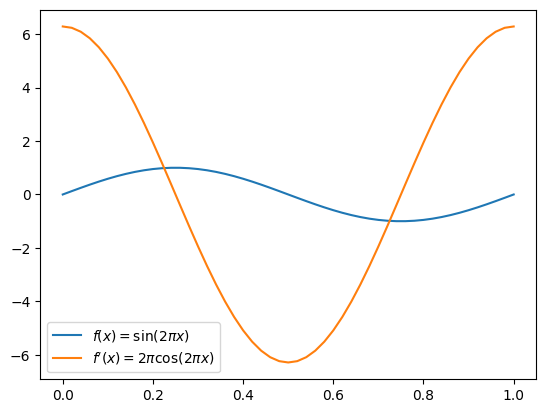

In [4]:
def f(x):
   return np.sin(2*np.pi*x)

def df(x):
   return 2*np.pi*np.cos(2*np.pi*x)

n = 51 # number of sample points
x = np.linspace(0, 1, n)
plt.plot(x, f(x), label="$f(x) = \\sin(2 \\pi x)$")
plt.plot(x, df(x), label="$f'(x) = 2 \\pi \\cos(2 \\pi x)$")
plt.legend()
plt.show()

Now let's compute the forward difference quotient.

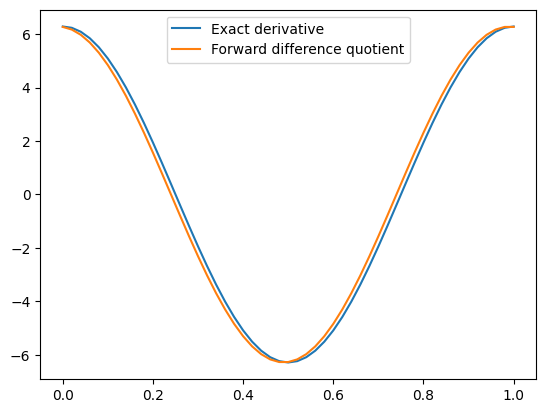

In [5]:
D_F = np.zeros(n)
h = x[1]
for i in range(n):
   xi = i*h
   D_F[i] = (f(xi + h) - f(xi)) / h

plt.plot(x, df(x), label="Exact derivative")
plt.plot(x, D_F, label="Forward difference quotient")
plt.legend()
plt.show()

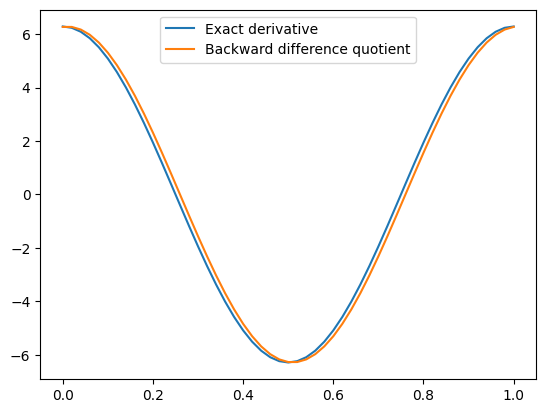

In [6]:
D_B = np.zeros(n)
h = x[1]
for i in range(n):
   xi = i*h
   D_B[i] = (f(xi) - f(xi - h)) / h

plt.plot(x, df(x), label="Exact derivative")
plt.plot(x, D_B, label="Backward difference quotient")
plt.legend()
plt.show()

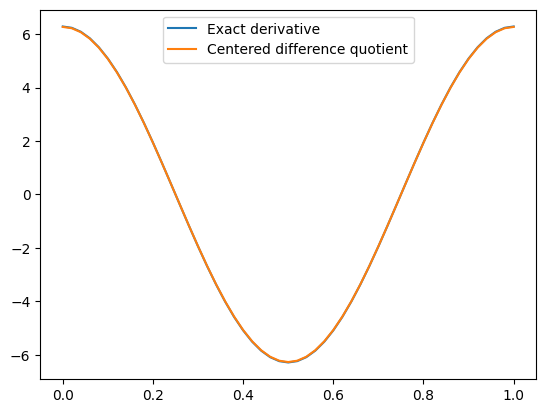

In [7]:
D_C = np.zeros(n)
h = x[1]
for i in range(n):
   xi = i*h
   D_C[i] = (f(xi + h) - f(xi - h)) / (2*h)

plt.plot(x, df(x), label="Exact derivative")
plt.plot(x, D_C, label="Centered difference quotient")
plt.legend()
plt.show()

Let's now try to quantify the error. For simplicitly, we'll estimate $\sin'(1)$, and vary the step
size $h$. Since we know the exact derivative, we can easily compute the error of our approximation.

In [8]:
# Use these values for h
h = 2.0 ** np.arange(-1, -10, -1)
h

array([0.5       , 0.25      , 0.125     , 0.0625    , 0.03125   ,
       0.015625  , 0.0078125 , 0.00390625, 0.00195312])

In [9]:
def f(x):
   return np.sin(x)

def df(x):
   return np.cos(x)

def forward_diff(x, h):
   return (f(x+h) - f(x))/h

def backward_diff(x, h):
   return (f(x) - f(x-h))/h

def centered_diff(x, h):
   return (f(x+h) - f(x-h))/(2*h)

In [10]:
FD = forward_diff(1, h)
BD = backward_diff(1, h)
CD = centered_diff(1, h)

# Compute the error using the exact answer of 1

FD_error = np.abs(FD - df(1))
BD_error = np.abs(BD - df(1))
CD_error = np.abs(CD - df(1))

In [12]:
import pandas
pandas.DataFrame(data=np.transpose([FD_error, BD_error, CD_error]), columns=["Forward", "Backward", "Centered"])

,Forward,Backward,Centered
0,0.228254,0.183789,2.223286e-02
1,0.110248,0.099027,5.610587e-03
2,0.053929,0.051118,1.405938e-03
3,0.026639,0.025936,3.516906e-04
4,0.013235,0.013059,8.793553e-05
5,0.006596,0.006552,2.198469e-05
6,0.003292,0.003281,5.496223e-06
7,0.001645,0.001642,1.374059e-06
8,0.000822,0.000821,3.435149e-07


It is clear from this table that the centered difference quotient is much more accurate. Let's try
to numerically confirm the rates we expect.

The Taylor series argument showed that the forward and backward difference quotients approximate the
first derivative with an error that scales like $\mathcal{O}(h)$, while the centered difference 
quotient has an error that scales like $\mathcal{O}(h^2)$.

We chose our step size $h$ to be $h_i = 2^{-i}$ for $i = 1, 2, 3, \ldots$

Let $e_F$ denote the error of the forward difference quotient (i.e. $e_F = | D_F f(x) - f'(x) |$).
Then, we know that
$$
   e_F \leq ch + \mathcal{O}(h^2).
$$
So, for $e_{F,i+1}$ (corresponding to step size $h_{i+1}$) we have
$$
\begin{align*}
   e_{F,i+1}
      &\leq ch_{i+1} + \mathcal{O}(h_{i+1}^2) \\
      &= \frac{1}{2} c h_i + \mathcal{O}(h_{i}^2) \\
      &\leq \frac{1}{2} e_{F,i} + \mathcal{O}(h_{i}^2)
\end{align*}
$$
which means that halving $h$ should also approximately halve the error (and the ratio of errors
will approach $\frac{1}{2}$ as $h \to 0$).

On the other hand, the centered difference quotient is _second-order accurate_, meaning
$$
   e_C \leq c h^2 + \mathcal{O}(h^3),
$$
and
$$
\begin{align*}
   e_{C,i+1}
      &\leq ch_{i+1}^2 + \mathcal{O}(h_{i+1}^3) \\
      &= \frac{1}{4} c h_i^2 + \mathcal{O}(h_{i}^3) \\
      &\leq \frac{1}{4} e_{F,i} + \mathcal{O}(h_{i}^3),
\end{align*}
$$
and so halving $h$ should result in a reduction of the error by a factor of 4.

More generally, for $e(h) \sim h^p$ (we would call this a pth-order accurate method), we have $e(rh) \sim r^p h^p \sim r^p e(h)$.

## Emperical rate of convergence

Suppose we have two step sizes, $h_1$ and $h_2$, and we (numerically) compute the errors $e_1$ and
$e_2$. We assume that the method has order of accuracy $p$, i.e. $e \sim h^p$. We will estimate the
**rate** $p$ numerically.

$$
\begin{align*}
   \frac{
      \log\left( e_1 / e_2 \right)
   }{
      \log\left( h_1 / h_2 \right)
   }
      &\sim \frac{
         \log\left( h_1^p/h_2^p \right)
      }{
         \log\left( h_1 / h_2 \right)
      } \\
      &= \frac{
         p \log\left( h_1/h_2 \right)
      }{
         \log\left( h_1 / h_2 \right)
      } \\
      &= p
\end{align*}
$$

In [15]:
def rate(errors, h_ratio):
   return np.log(errors[:-1]/errors[1:])/np.log(h_ratio)

def prepend_nan(array):
   return np.concatenate(([np.nan], array))

df = pandas.DataFrame(
   data=np.transpose([
      FD_error, prepend_nan(rate(FD_error, 2)),
      BD_error, prepend_nan(rate(FD_error, 2)),
      CD_error, prepend_nan(rate(CD_error, 2))
   ]),
   columns=["Forward", "Rate", "Backward", "Rate", "Centered", "Rate"]
)
df.style.format(na_rep="---")

,Forward,Rate,Backward,Rate,Centered,Rate
0,0.228254,---,0.183789,---,0.022233,---
1,0.110248,1.049893,0.099027,1.049893,0.005611,1.986470
2,0.053929,1.031605,0.051118,1.031605,0.001406,1.996618
3,0.026639,1.017527,0.025936,1.017527,0.000352,1.999155
4,0.013235,1.009204,0.013059,1.009204,0.000088,1.999789
5,0.006596,1.004713,0.006552,1.004713,0.000022,1.999947
6,0.003292,1.002384,0.003281,1.002384,0.000005,1.999987
7,0.001645,1.001199,0.001642,1.001199,0.000001,1.999997
8,0.000822,1.000601,0.000821,1.000601,0.000000,1.999999


Another way of seeing the rate (graphically) is to plot the errors on a log-log scale.

The error has the form
$$
e \sim h^p
$$
and so
$$
\log(e) \sim \log(h^p) = p \log(h)
$$
and therefore $\log(e)$ and $\log(h)$ are linearly related with slope $p$.

On a log-log plot, errors of this form will appear linear with slopes corresponding to the rates.

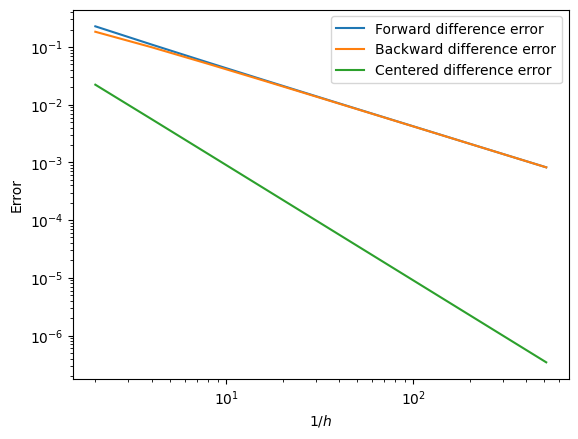

In [16]:
plt.loglog(1/h, FD_error, label="Forward difference error")
plt.loglog(1/h, BD_error, label="Backward difference error")
plt.loglog(1/h, CD_error, label="Centered difference error")
plt.xlabel("$1/h$")
plt.ylabel("Error")
plt.legend()
plt.show()

### Using finite differences to solve a Poisson problem

We will often be interested in the following **model problem**.

Consider Laplace's equation
$$
-\Delta u = 0
$$
where $\Delta$ is the Laplacian $\sum_{i=1}^d \dfrac{\partial^2}{\partial x_i^2}$.

More generally we consider the **Poisson problem**
$$
-\Delta u = f
$$
in the domain $\Omega \subseteq \mathbb{R}^d$ subject to the appropriate boundary conditions on $\partial\Omega$.

For now, let's consider the 1D problem with $\Omega = [0,1]$,
$$\begin{equation} \tag{$*$}
\left\{
   \begin{aligned}
      -u''(x) &= f \\
      u(0) &= 0 \\
      u(1) &= 0
   \end{aligned}
\right.
\end{equation}$$
with **homogeneous Dirichlet boundary conditions**.

We can formulate a simple _finite difference_ method to solve this problem.

Consider $N + 1$ grid points with spacing $h$, i.e.
$$
   x_i = ih, \qquad i = 0, 1, \ldots, N.
$$
Then, we _discretize_ $(*)$ by replacing the derivatives with finite difference quotients.

In particular, consider the centered finite difference quotient approximating the second derivative,
$$
   f''(x) \approx D^2 f(x) := \frac{f(x-h) - 2 f(x) + f(x+h)}{h^2}
$$

Then, a discretization of $(*)$ could be given by
$$
\left\{
   \begin{aligned}
      u_0 &= 0\\
      u_N &= 0\\
      -D^2 u_i &= f(x_i) \qquad \text{for $1 \leq i \leq N-1$}
   \end{aligned}
\right.
$$
where
$$
   D^2 u_i := \frac{u_{i-1} - 2u_i + u_{i+1}}{h^2}.
$$

After picking the number of grid points $N$, this will result in a _linear system of equations_ to solve for the approximate solution $u_i$ at each point. The system will take the form

$$
   \frac{1}{h^2}
   \begin{pmatrix}
       1 &  \cdot &  \cdot &  \cdot & \cdots & \cdot & \cdot & \cdot & \cdot\\
      -1 &  2 & -1 &  \cdot & \cdots & \cdot & \cdot & \cdot & \cdot\\
       \cdot & -1 &  2 & -1 & \cdots & \cdot & \cdot & \cdot & \cdot\\
      \vdots & \vdots & \vdots & \vdots & \ddots &   \\
      \cdot & \cdot & \cdot & \cdot & \cdots & \cdot & -1 & 2 & -1 \\
      \cdot & \cdot & \cdot & \cdot & \cdots & \cdot & \cdot & \cdot &  1 
   \end{pmatrix}
   \begin{pmatrix}
      u_0 \\ u_1 \\ u_2 \\ \vdots \\ u_{N-1} \\ u_N
   \end{pmatrix}
   =
   \begin{pmatrix}
      0 \\ f(x_1) \\ f(x_2) \\ \vdots \\ f(x_{N-1}) \\ 0
   \end{pmatrix}
$$

#### Simple Poisson solver in Python

In [18]:
def make_grid(N):
   return np.linspace(0, 1, N+1)

def make_poisson_matrix(N):
   A = np.zeros((N+1, N+1))
   # Boundary conditions
   A[0,0] = 1.0 # First row/column
   A[-1,-1] = 1.0 # Last row/column
   # Difference quotients
   for i in range(1, N):
      A[i,i-1] = -1
      A[i,i] = 2
      A[i,i+1] = -1
   h = 1.0 / N
   A /= h*h
   return A

Let's pick the right-hand side $f(x) = (2 \pi)^2 \sin(2 \pi x)$. It is easy to verify that the exact solution to this problem is $u(x) = \sin(2 \pi x)$.

In [19]:
def f(x):
   return ((2*np.pi)**2)*np.sin(2*np.pi*x)

def solve_poisson(N):
   x = make_grid(N)
   b = f(x)
   A = make_poisson_matrix(N)
   u = np.linalg.solve(A, b)
   return u

Let's plot the solution to visually verify that it looks as expected:

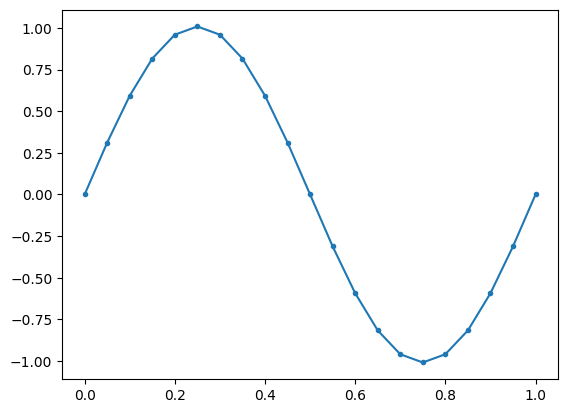

In [20]:
plt.plot(make_grid(20), solve_poisson(20), marker=".")

This looks roughly like what we would expect.

Let's calculate the error numerically using our knowledge of the exact solution.

We will calculate the $\ell_\infty$ error,
$$
e = \max_i | u_i - u(x_i) |
$$
where $u$ is the exact solution.

In [21]:
def poisson_error(N):
   return np.max(np.abs(solve_poisson(N) - np.sin(2*np.pi*make_grid(N))))

Let's compute the rate of convergence as discussed above. We will estimate
$$
\text{rate} \approx \frac{\log(e_1/e_2)}{\log(h_1/h_2)}
$$

In [22]:
def rate(N):
   e1 = poisson_error(N)
   e2 = poisson_error(2*N)
   return np.log(e1/e2) / np.log(2)

In [23]:
[rate(10), rate(20), rate(40), rate(80), rate(160)]

[np.float64(1.9491170242964309),
 np.float64(2.0053492492832907),
 np.float64(2.0013354950006845),
 np.float64(2.000333760343218),
 np.float64(2.000083432744725)]

As we could have guessed, this method is converging with **second-order accuracy**.

A simple Taylor series argument would show that
$$
   | u''(x) - D^2 u(x) | = \mathcal{O}(h^2),
$$
so this is expected behavior.

**But**, we haven't given a rigorous proof that our finite difference method will really converge to the exact solution of the differential equation with second-order accuracy (only that the _consistency error_ is second-order).

---

### Next time: finite elements for the same problem

This discussion on finite differences was intended as a warm-up to familiarize ourselves with simple model problem, recall the notions of accuracy and order of convergence, and perform some basic computaitons.

However, the focus of this course will not be on finite difference methods, but rather **finite element methods**. This approach will have **many similiarities** with the finite difference method, but also some **important (practical and philosophical) differences**.

Using finite element methods will help us:

* Understand, analyze, and prove accuracy and other properties of our discretization in a systematic way
* Easily translate mathematical equations into discretizations that can be solved on the computer
* Handle complicated geometries in multiple dimensions (unstructured meshes)
* Incorporate adaptivity
* "Mimic" important properties of the equations (conservation, etc.)